In [35]:
import seaborn as sns
from scipy import ndimage, misc
from numpy.random import choice
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from matplotlib.colors import ListedColormap

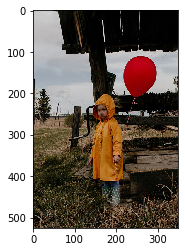

In [36]:
pix3 = np.array(Image.open("leto2.jpg"))
ax = plt.subplot()
ax.imshow(pix3);

In [45]:
db = KMeans(n_clusters = 30)
data2 = [(x, y, pix3[x, y][0], pix3[x, y][1], pix3[x, y][2]) for x in range(pix3.shape[0]) for y in range(pix3.shape[1])]
db_clusters=db.fit_predict(data2)

In [46]:
def find_box_cluster(db):
    number = -1
    for center in db.cluster_centers_:
        number += 1
        if center[2] > 140 and center[2] < 255:
            if center[3] > 0 and center[3] < 60:
                if center[4] > 0 and center[4] < 100:
                    return number

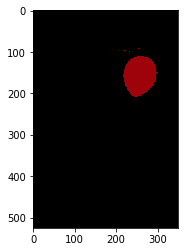

In [54]:
pix3_1 = np.zeros(pix3.shape, np.uint8)
center_number = find_box_cluster(db)
for p, c in zip(data2, db_clusters):
    if center_number == c:
        pix3_1[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                              int(db.cluster_centers_[c, 3]), 
                              int(db.cluster_centers_[c, 4]))
ax = plt.subplot()
ax.imshow(pix3_1);